In [64]:
import pandas as pd
import nltk
import numpy as np
import seaborn as sns
import inspect
import matplotlib.pyplot as plt

import re

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mikha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [85]:
df = pd.read_excel("posts.xlsx")
df.head()

,Unnamed: 0,id,date,text,publisher,reaction,comment
0,0,95367da2-8313-49c4-81f5-cbb1f8af69be,2023-01-14 17:17:08.793,"Что происходит на Мосбирже, останется на Мосби...",Pulse_Official,161,111.0
1,1,c179933b-b992-41a8-953c-e8cddce0a277,2023-01-13 16:30:00.000,В прямом эфире Василий Олейник и Ирина Ахмадул...,Tinkoff_Investments,140,29.0
2,2,9ee444e3-0ff1-4622-82b9-6ff7b1d00ec7,2023-01-12 06:50:00.000,Доброе утро! \nПродолжаем говорить на тематику...,Invest_Dim,315,149.0
3,3,4963f23d-f3ef-4c53-903e-74f62b851aab,2023-01-13 16:25:00.000,"Российский рынок \n\nНапоминаем, что по акциям...",Tinkoff_Investments,67,15.0
4,4,bedb0a0f-7657-4d27-a1fd-0b8005813eb5,2023-01-12 13:41:00.000,📊 Инфляционные ожидания: что такое и зачем их ...,FinDay,105,12.0


In [86]:
df.describe()

,Unnamed: 0,reaction,comment
count,3450.000000,3450.000000,3418.000000
mean,1724.500000,161.273043,177.120538
std,996.073541,147.782744,937.298884
min,0.000000,2.000000,1.000000
25%,862.250000,65.000000,16.000000
50%,1724.500000,129.000000,40.000000
75%,2586.750000,214.000000,91.000000
max,3449.000000,1672.000000,12891.000000


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3450 entries, 0 to 3449
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  3450 non-null   int64         
 1   id          3450 non-null   object        
 2   date        3450 non-null   datetime64[ns]
 3   text        3450 non-null   object        
 4   publisher   3450 non-null   object        
 5   reaction    3450 non-null   int64         
 6   comment     3418 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 188.8+ KB


In [68]:
df.isnull().sum()

Unnamed: 0     0
id             0
date           0
text           0
publisher      0
reaction       0
comment       32
dtype: int64

In [69]:
df['comment'] = df['comment'].fillna(0)

In [88]:
import re

def standardize_text(text):
    text = text.lower()
    text = re.sub('@[^\s]+', '', text)
    text = re.sub('http[^\s]+', '', text)
    text = re.sub('\$\d+\.\d{2}', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub("[^\w\s]","", text) # возможно плохая
    text = re.sub('\n', ' ', text)
    text = re.sub('\xa0', ' ', text)
    return text



In [89]:
df['text'][8]


'🤓 Японские свечи, топливные брикеты и история о дружбе инвесторов\n\nОбсуждаем самые популярные и интересные посты этой недели в Пульсе.\n\n🧬В топе по просмотрам сплошь новостные дайджесты. Самые популярные от\xa0 @Dengy_ne_problema (около 15 тыс. просмотров), @Fomag.ru (13,4 тыс) и @Yverenno (12,1 тыс).\n\n🧬Но нам бы хотелось отметить образовательный пост @GilmanovMedia про японские свечи. Наглядно (с картинкой) и просто автор объясняет, как работает инструмент технического анализа и, что важно, не выдает его за панацею. Результат — больше 400 комментов и 100 лайков, 11,5 тыс. просмотров.\xa0\n\n🧬Также в топе по лайкам пост про зависание нашего приложения от @GoodMoneyWork (397 лайков). Все оперативно починили, спасибо, что помогаете нам находить и исправлять ошибки. А также обзор российского рынка на постпраздничной неделе от @Karsotel (348 лайков).\xa0\n\n🧬Бодро ворвалась в Пульс редакция информагентства для трейдеров и инвесторов Биржевик — @BirzhevikOfficial. Ребята пишут годный 

In [90]:
df['text'] = df['text'].apply(standardize_text)

#Tokenization with NLTK

In [91]:
from nltk.tokenize import word_tokenize

df['token'] = df['text'].apply(word_tokenize)

In [92]:
all_words = [word for tokens in df["token"] for word in tokens]
text_lengths = [len(tokens) for tokens in df["token"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(text_lengths))

893079 words total, with a vocabulary size of 59045
Max sentence length is 1768


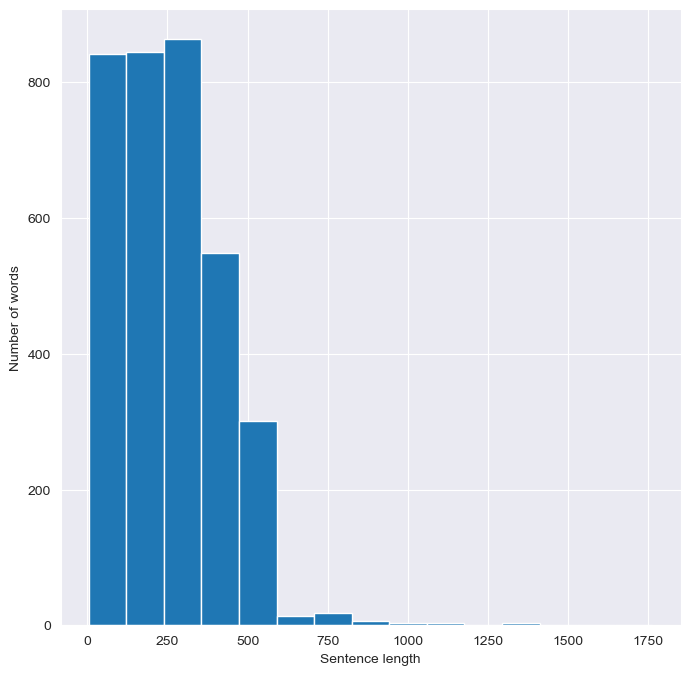

In [79]:
fig = plt.figure(figsize=(8, 8))
plt.xlabel('Sentence length')
plt.ylabel('Number of words')
plt.hist(text_lengths, bins=15)
plt.show()